# **Knapsack Problem**

Performs **OPTIMIZATION** problem for 50 generation:

Population management = **Generational model**

Representation = **Binary**

**Define functions:**


In [ ]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt
from tabulate import tabulate

num_objects = 10
num_population = 8
num_generations = 50
M = 50
start_w = 1
end_w = 20
start_v = 100
end_v = 1000
crossover_rate = 0.8
mutation_rate = 0.4

We can define the **fitness function** as follows:
\begin{aligned}
\\fitness=\sum_{i=1}^nc_iv_i;\qquad if\quad \sum_{i=1}^nc_iw_i <= M \\ 
fitness=0;\qquad\qquad\qquad\qquad\quad otherwise
\end{aligned}
Where:
>\begin{align}
n = chromosome\ length\qquad\qquad\qquad\ \\
c_i = ith\ gene\qquad\qquad\qquad\qquad\qquad\quad\ \\
v_i = ith\ value\qquad\qquad\qquad\qquad\qquad\quad\\
w_i = ith\ weight\qquad\qquad\qquad\qquad\qquad\ \\
M = Maximum\ weight\ of\ the\ bag\qquad
\end{align}

In [ ]:
def fitness_calculation(weight, value, population, M):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= M:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)

Parent selection = **Fitness Propotionate Selection**

Implementing selection probabilities = **Stuchastic universal sampling**

In [ ]:
def selection_fps(fitness, population):
    fitness = list(fitness)
    parents = np.empty((num_population, population.shape[1]))

    prob = expected = actual = [0]*num_population
    s_fitness = sum(fitness)
    for i in range(num_population):
      prob[i] = fitness[i]/s_fitness
      expected[i] = prob[i]*num_population
      actual[i] = round(expected[i])
    
    while sum(actual) != num_population:
      if sum(actual) > num_population:
        idx_nonzero = next((i for i, x in enumerate(actual) if x), None)
        actual[idx_nonzero] -= 1
      else:
        idx_nonzero = next((i for i, x in enumerate(actual) if x), None)
        actual[idx_nonzero] += 1
    
    k = 0
    for i in range(num_population):
      for j in range(int(actual[i])):
        parents[k][:] = population[i][:]
        k += 1
    return parents.astype(int)

In [ ]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i] = population[max_fitness_idx[0][0]]
        fitness[max_fitness_idx[0][0]] = -1000
    return parents.astype(int)

Crossover = **One_point crossover**

Crossover pobability = 0.8


In [ ]:
def crossover(parents2, num_offsprings):
    offsprings = np.empty((num_offsprings, parents2.shape[1]))
    crossover_point = int(parents2.shape[1]/2)
    
    i=0
    counter_offspring = 0
    mylist = list(range(0, parents2.shape[0]))
    list_population = rd.sample(mylist, len(mylist))
    while (counter_offspring < num_offsprings):
      x = rd.random()
      if x < crossover_rate:
        offsprings[i][0:crossover_point] = parents2[list_population[i]][0:crossover_point]
        offsprings[i][crossover_point:] = parents2[list_population[i+1]][crossover_point:]
        offsprings[i+1][0:crossover_point] = parents2[list_population[i+1]][0:crossover_point]
        offsprings[i+1][crossover_point:] = parents2[list_population[i]][crossover_point:]
        counter_offspring += 2
        i += 2
      else:
        offsprings[i][:] = parents2[list_population[i]][:]
        offsprings[i+1][:] = parents2[list_population[i+1]][:]
        counter_offspring += 2
        i += 2
    return offsprings.astype(int)

Mutation = **Bit_flip mutation**

Mutation probability = 0.4

In [ ]:
def mutation(offsprings):
    
    for i in range(offsprings.shape[0]):
      x = rd.random()
      if x < mutation_rate:
        random_number = rd.randint(0,7)
        if offsprings[i,random_number] == 0 :
          offsprings[i,random_number] = 1
        else:
          offsprings[i,random_number] = 0
      else:
        pass

    return offsprings.astype(int)

Convert an integer matrix to string matrix for representation:


In [ ]:
def convert_to_str(pop):
    int_pop = [[0]*num_objects]*num_population
    for i in range(len(pop)):
      int_pop[i] = pop[i]

    dif = num_population-len(pop)
    list_obj2 = [2]*num_objects
    for i in range(dif):
      int_pop[dif+i] = list_obj2

    str_pop = [[0]*num_objects]*num_population
    for i in range(num_population):
      str_obj = ""
      for j in range(num_objects):
        if int_pop[i][j] == 1:
          str_obj += "1"
        elif int_pop[i][j] == 0:
          str_obj += "0"
        else:
          str_obj += "-"
      str_pop[i] = str_obj
    return str_pop

# Initial population & Perform calculations:

> Number of objects (gen) = 10

> Number of population (chromosume) = 8

> Number of generation = 50

> M (Maximum weight of the bag) = 50

> Range of weights = 1-20

> Range of values = 100-1000

**First selection (FPS):**

In [ ]:
item_number = np.arange(1,num_objects+1)
weight = np.random.randint(start_w, end_w, size = num_objects)
value = np.random.randint(start_v, end_v, size = num_objects)

pop_size = (num_population, item_number.shape[0])
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)

In [ ]:
a = np.array([item_number])
b = np.array([weight])
c = np.array([value])
Matrix = np.concatenate((a, b, c))
Matrix = [[Matrix[j][i] for j in range(len(Matrix))] for i in range(len(Matrix[0]))]
print(tabulate(Matrix, headers=["Item num", "Weight", "Value"], tablefmt="grid"))

+------------+----------+---------+
|   Item num |   Weight |   Value |
+============+==========+=========+
|          1 |       14 |     337 |
+------------+----------+---------+
|          2 |       12 |     863 |
+------------+----------+---------+
|          3 |       16 |     538 |
+------------+----------+---------+
|          4 |        7 |     821 |
+------------+----------+---------+
|          5 |       15 |     677 |
+------------+----------+---------+
|          6 |        8 |     775 |
+------------+----------+---------+
|          7 |        2 |     915 |
+------------+----------+---------+
|          8 |        9 |     209 |
+------------+----------+---------+
|          9 |       18 |     493 |
+------------+----------+---------+
|         10 |       10 |     572 |
+------------+----------+---------+


In [ ]:
population = initial_population

population_history, parameters, fitness_history = [], [], []
for i in range(num_generations):
  fitness = fitness_calculation(weight, value, population, M)
  fitness_history.append(fitness)
  parents = selection_fps(fitness, population)
  offsprings = crossover(parents, num_population)
  population = mutation(offsprings)
  population_history.append(population)
  print("\nGeneration ",i," : fitness = ",fitness)



Generation  0  : fitness =  [   0    0 1367    0 1507    0 2471 1112]

Generation  1  : fitness =  [ 546 2471    0 1507 1556 2471 1321 1933]

Generation  2  : fitness =  [ 493 2233  984 2808 2471 2471 3334 1933]

Generation  3  : fitness =  [   0    0  775 3629 3148 1556    0 4155]

Generation  4  : fitness =  [4155 3148 3240 3420 2471 2714 3240 3148]

Generation  5  : fitness =  [4155 2233 3946 3240 1556 3629 3629 2939]

Generation  6  : fitness =  [4155 3629 3420 3148    0 2939 3240 4155]

Generation  7  : fitness =  [4155 3240 2854 4155 3334 3148 2939    0]

Generation  8  : fitness =  [3240 3334 3236 3420 4155 3148 4155 4155]

Generation  9  : fitness =  [3292 3946 2419 3292    0 3380 3148 4155]

Generation  10  : fitness =  [3946    0 2714 3125 3148 4155 3292    0]

Generation  11  : fitness =  [3380 2714 3663    0 2377 4155 2939 3292]

Generation  12  : fitness =  [   0 2517 2373 3946 2377 2517 3946    0]

Generation  13  : fitness =  [3083 2517 3194 2373 2419 2168 3946 3946]

G

In [ ]:
# As an example, we show the latest generations in the table

last_pop1 = population_history[num_generations-2]
last_pop1 = convert_to_str(last_pop1)

last_fitness1 = fitness_history[num_generations-2]

last_selection = parents
last_selection = convert_to_str(last_selection)

last_cross = offsprings
last_cross = convert_to_str(last_cross)

last_pop2 = population_history[num_generations-1]
last_pop2 = convert_to_str(last_pop2)

last_fitness2 = fitness_history[num_generations-1]

a = np.array([last_pop1])
b = np.array([last_fitness1])
c = np.array([last_selection])
d = np.array([last_cross])
e = np.array([last_pop2])
f = np.array([last_fitness2])
Matrix = np.concatenate((a, b, c, d, e, f))
Matrix = [[Matrix[j][i] for j in range(len(Matrix))] for i in range(len(Matrix[0]))]
print(tabulate(Matrix, headers=["Population", "Fitness", "Pop selection", "Pop crossover", "Pop mutation", "Final fitness"], tablefmt="grid"))

+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   Population |   Fitness |   Pop selection |   Pop crossover |   Pop mutation |   Final fitness |
+==============+===========+=================+=================+================+=================+
|   0101011101 |      2808 |      0101011101 |      1001011001 |     1001011001 |            4155 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   1100011101 |      3097 |      0101011101 |      0001011101 |     0001011101 |               0 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   0110001101 |      2262 |      0110001101 |      0101011101 |     0101011101 |            3097 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   1001001001 |      3125 |      1001001001 |      0101001001 |     0101001001 |            2645 |


First generation: 
[[1 0 1 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 1 1 1 1]
 [1 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 0 1 1]
 [1 0 0 0 1 0 0 0 1 0]
 [1 1 1 1 0 1 1 1 0 1]
 [0 0 0 0 0 1 1 1 0 1]
 [1 0 0 0 0 1 0 0 0 0]]

Last generation: 
[[1 0 0 1 0 1 1 0 0 1]
 [0 0 0 1 0 1 1 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [0 1 0 1 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 1 0 1]
 [0 1 1 0 0 1 0 0 0 1]
 [0 1 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 1 1 1 0 1]]



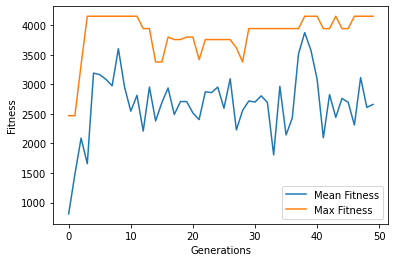

(50, 8)


In [ ]:
print('First generation: \n{}\n'.format(initial_population))
print('Last generation: \n{}\n'.format(population)) 
fitness_last_gen = fitness_calculation(weight, value, population, M)      
max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
parameters.append(population[max_fitness[0][0],:])

fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# Initial population & Perform calculations:

> Number of objects (gen) = 10

> Number of population (chromosume) = 8

> Number of generation = 50

> M (Maximum weight of the bag) = 50

> Range of weights = 1-20

> Range of values = 100-1000

**Second selection:**

In [ ]:
item_number = np.arange(1,num_objects+1)
weight = np.random.randint(start_w, end_w, size = num_objects)
value = np.random.randint(start_v, end_v, size = num_objects)

pop_size = (num_population, item_number.shape[0])
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)


In [ ]:
a = np.array([item_number])
b = np.array([weight])
c = np.array([value])
Matrix = np.concatenate((a, b, c))
Matrix = [[Matrix[j][i] for j in range(len(Matrix))] for i in range(len(Matrix[0]))]
print(tabulate(Matrix, headers=["Item num", "Weight", "Value"], tablefmt="grid"))

+------------+----------+---------+
|   Item num |   Weight |   Value |
+============+==========+=========+
|          1 |        4 |     789 |
+------------+----------+---------+
|          2 |        7 |     910 |
+------------+----------+---------+
|          3 |        3 |     780 |
+------------+----------+---------+
|          4 |       13 |     460 |
+------------+----------+---------+
|          5 |        2 |     930 |
+------------+----------+---------+
|          6 |       17 |     389 |
+------------+----------+---------+
|          7 |       11 |     947 |
+------------+----------+---------+
|          8 |        6 |     188 |
+------------+----------+---------+
|          9 |       13 |     990 |
+------------+----------+---------+
|         10 |       19 |     286 |
+------------+----------+---------+


In [ ]:
population = initial_population

population_history, parameters, fitness_history = [], [], []
num_parents = int(num_population/2)
num_offsprings = num_population - num_parents
for i in range(num_generations):
  fitness = fitness_calculation(weight, value, population, M)
  fitness_history.append(fitness)
  parents = selection(fitness, num_parents, population)
  offsprings = crossover(parents, num_offsprings)
  mutants = mutation(offsprings)
  population[0:parents.shape[0], :] = parents
  population[parents.shape[0]:, :] = mutants
  population_history.append(population)
  print("\nGeneration ",i," : fitness = ",fitness)



Generation  0  : fitness =  [3277 1240    0    0 1622 2905 3055 1967]

Generation  1  : fitness =  [3277 3055 2905 1967    0 1118 2888 2914]

Generation  2  : fitness =  [3277 3055 2914 2905 2914 3694 4267  188]

Generation  3  : fitness =  [4267 3694 3277 3055 4267 2559 4267 1118]

Generation  4  : fitness =  [4267 4267 4267 3694    0 4267 1958    0]

Generation  5  : fitness =  [4267 4267 4267 4267 3478 4267 3337    0]

Generation  6  : fitness =  [4267 4267 4267 4267 4267 4267 4267 4267]

Generation  7  : fitness =  [4267 4267 4267 4267 4267 4267    0    0]

Generation  8  : fitness =  [4267 4267 4267 4267 3807 4079 4267 4267]

Generation  9  : fitness =  [4267 4267 4267 4267 4267 4267 4079    0]

Generation  10  : fitness =  [4267 4267 4267 4267 4267 4267 4267 4267]

Generation  11  : fitness =  [4267 4267 4267 4267 4267 3807 3337 4267]

Generation  12  : fitness =  [4267 4267 4267 4267    0    0 3337    0]

Generation  13  : fitness =  [4267 4267 4267 4267 3337 3478 3337 3357]

G

In [ ]:
# As an example, we show the latest generations in the table

last_pop1 = population_history[num_generations-2]
last_pop1 = convert_to_str(last_pop1)

last_fitness1 = fitness_history[num_generations-2]

last_selection = parents
last_selection = convert_to_str(last_selection)

last_cross = offsprings
last_cross = convert_to_str(last_cross)

last_pop2 = population_history[num_generations-1]
last_pop2 = convert_to_str(last_pop2)

last_fitness2 = fitness_history[num_generations-1]

a = np.array([last_pop1])
b = np.array([last_fitness1])
c = np.array([last_selection])
d = np.array([last_cross])
e = np.array([last_pop2])
f = np.array([last_fitness2])
Matrix = np.concatenate((a, b, c, d, e, f))
Matrix = [[Matrix[j][i] for j in range(len(Matrix))] for i in range(len(Matrix[0]))]
print(tabulate(Matrix, headers=["Population", "Fitness", "Pop selection", "Pop crossover", "Pop mutation", "Final fitness"], tablefmt="grid"))

+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   Population |   Fitness | Pop selection   | Pop crossover   |   Pop mutation |   Final fitness |
+==============+===========+=================+=================+================+=================+
|   1111100110 |      5047 | 1111100110      | 1111110110      |     1111100110 |            5047 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   1111100110 |      5047 | 1111100110      | 1111100110      |     1111100110 |            5047 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   1111100110 |      5047 | 1111100110      | 0111100110      |     1111100110 |            5047 |
+--------------+-----------+-----------------+-----------------+----------------+-----------------+
|   1111100110 |      5047 | 1111100110      | 1111110110      |     1111100110 |            5047 |


First generation: 
[[1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1 1 0]]

Last generation: 
[[1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1 1 0]
 [1 1 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1 1 0]]



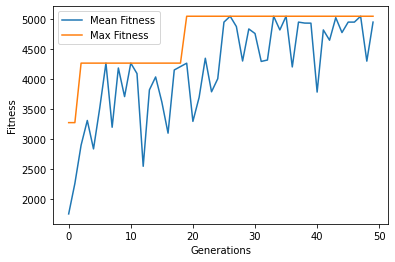

In [ ]:
print('First generation: \n{}\n'.format(initial_population))
print('Last generation: \n{}\n'.format(population)) 
fitness_last_gen = fitness_calculation(weight, value, population, M)      
max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
parameters.append(population[max_fitness[0][0],:])

fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()